In [2]:
import numpy as np
from astropy import units as u
from poliastro.bodies import Earth
from poliastro.twobody import Orbit
import plotly.graph_objects as go
# plt.rcParams["font.family"] = 'Serif'

In [2]:
traces = []

# 1. Sample circle in 3D
theta = np.linspace(0, 2*np.pi, 300)
orbit_defs = {
    "LEO (400 km)":   400  * u.km,
    "MEO (20 000 km)":20_000 * u.km,
    "GEO (35 786 km)":35_786 * u.km,
}

# 2. Draw each orbit as a 3D line
for name, alt in orbit_defs.items():
    a = (Earth.R + alt).to(u.km).value  # semi-major axis
    x = a * np.cos(theta)
    y = a * np.sin(theta)
    z = np.zeros_like(theta)           # equatorial plane
    orb = Orbit.circular(Earth, alt, inc=0*u.deg)
    traces.append(
        go.Scatter3d(
            x=x, y=y, z=z,
            mode='lines',
            name=f"{name} (T={orb.period.to(u.hour).value:.2f} h)",
            line=dict(width=4)
        )
    )

# 3. Create a sphere for Earth
phi = np.linspace(0, np.pi, 30)
lam = np.linspace(0, 2*np.pi, 30)
Phi, Lam = np.meshgrid(phi, lam)
Re = Earth.R.to(u.km).value
Xs = Re * np.sin(Phi) * np.cos(Lam)
Ys = Re * np.sin(Phi) * np.sin(Lam)
Zs = Re * np.cos(Phi)

traces.append(
    go.Surface(
        x=Xs, y=Ys, z=Zs,
        opacity=0.5,
        colorscale='Blues',
        showscale=False,
        name='Earth'
    )
)

In [3]:
fig = go.Figure(data=traces)

fig.update_layout(
    width=1500,
    height=700,

    # Title styling
    title=dict(
        text="3D Equatorial Orbits: LEO / MEO / GEO",
        font=dict(size=28)            # title font size
    ),

    # Legend styling
    legend=dict(
        font=dict(size=16),           # legend text size
        bgcolor="rgba(255,255,255,0.7)"  # semi-transparent background (optional)
    ),

    # Default font for hover, etc.
    font=dict(
        size=14                       # base font size
    ),

    scene=dict(
        xaxis=dict(
            title="X (km)",
            title_font=dict(size=20),  # x-axis label size
            tickfont=dict(size=12)     # x-axis tick label size
        ),
        yaxis=dict(
            title="Y (km)",
            title_font=dict(size=20),
            tickfont=dict(size=12)
        ),
        zaxis=dict(
            title="Z (km)",
            title_font=dict(size=20),
            tickfont=dict(size=12)
        ),
        aspectmode='data'
    )
)

fig.show()


In [4]:
# Orbital definitions: (perigee_alt, apogee_alt, inclination)
orbit_params = {
    "LEO (28.5°)":      (400, 400, 28.5),
    "SSO (98°)":        (700, 700, 98.0),
    "Polar (90°)":      (600, 600, 90.0),
    "GEO (0°)":         (35786, 35786, 0.0),
    "Molniya (63.4°)":  (500, 40000, 63.4),
}

traces = []
theta = np.linspace(0, 2*np.pi, 500)

for name, (perigee_km, apogee_km, inc_deg) in orbit_params.items():
    # Convert perigee/apogee to radius from Earth's centre
    r_p = (Earth.R + perigee_km * u.km).to(u.km)
    r_a = (Earth.R + apogee_km * u.km).to(u.km)

    # Semi-major axis
    a = (r_p + r_a) / 2

    # Correct eccentricity (Earth is at one focus)
    ecc = 1 - (r_p / a)

    # Inclination
    inc = inc_deg * u.deg

    # Create orbit using classical elements
    orb = Orbit.from_classical(Earth, a, ecc, inc, 0*u.deg, 0*u.deg, 0*u.deg)

    r = orb.sample(theta.size)
    traces.append(
        go.Scatter3d(
            x=r.x.to(u.km).value,
            y=r.y.to(u.km).value,
            z=r.z.to(u.km).value,
            mode='lines',
            name=name,
            line=dict(width=4)
        )
    )

# Earth sphere (wireframe)
phi = np.linspace(0, np.pi, 30)
lam = np.linspace(0, 2*np.pi, 30)
Phi, Lam = np.meshgrid(phi, lam)
Re = Earth.R.to(u.km).value
Xs = Re * np.sin(Phi) * np.cos(Lam)
Ys = Re * np.sin(Phi) * np.sin(Lam)
Zs = Re * np.cos(Phi)

traces.append(
    go.Surface(
        x=Xs, y=Ys, z=Zs,
        opacity=0.5,
        colorscale='Blues',
        showscale=False,
        name='Earth'
    )
)

In [5]:
fig = go.Figure(data=traces)

fig.update_layout(
    width=1500,
    height=700,

    # Title styling
    title=dict(
        text="3D Equatorial Orbits: LEO / MEO / GEO",
        font=dict(size=28)            # title font size
    ),

    # Legend styling
    legend=dict(
        font=dict(size=16),           # legend text size
        bgcolor="rgba(255,255,255,0.7)"  # semi-transparent background (optional)
    ),

    # Default font for hover, etc.
    font=dict(
        size=14                       # base font size
    ),

    scene=dict(
        xaxis=dict(
            title="X (km)",
            title_font=dict(size=20),  # x-axis label size
            tickfont=dict(size=12)     # x-axis tick label size
        ),
        yaxis=dict(
            title="Y (km)",
            title_font=dict(size=20),
            tickfont=dict(size=12)
        ),
        zaxis=dict(
            title="Z (km)",
            title_font=dict(size=20),
            tickfont=dict(size=12)
        ),
        aspectmode='data'
    )
)

fig.show()


In [3]:
# Orbits and altitudes
orbit_defs = {
    "LEO (400 km)": 400 * u.km,
    "LEO (500 km)": 500 * u.km,
    "LEO (600 km)": 600 * u.km,
}

print(f"{'Orbit':<20} {'Radius (km)':>12} {'v (km/s)':>10} {'T (hr)':>10} {'ε (km²/s²)':>15} {'h (km²/s)':>15} {'r_c (km)':>12} {'A_c (km²)':>17}" )
print("-" * 118)

eps = 10 # deg

for name, h in orbit_defs.items():
    orb = Orbit.circular(Earth, h)
    r = np.linalg.norm(orb.r.value)
    v = np.linalg.norm(orb.v.value)
    T = orb.period.to(u.h).value
    eps = orb.energy.value
    h_spec = orb.h_mag.value
    theta = np.arccos(Earth.R.to(u.km).value/r*np.cos(np.deg2rad(eps))) - np.deg2rad(eps)
    r_c = Earth.R.to(u.km).value*theta
    A_c = 2*np.pi*Earth.R.to(u.km).value**2*(1 - np.cos(theta))

    print(f"{name:<20} {r:12,.1f} {v:10.3f} {T:10.2f} {eps:15.2f} {h_spec:15,.2f} {r_c:12,.1f} {A_c:17,.1f}")

Orbit                 Radius (km)   v (km/s)     T (hr)      ε (km²/s²)       h (km²/s)     r_c (km)         A_c (km²)
----------------------------------------------------------------------------------------------------------------------
LEO (400 km)              6,778.1      7.669       1.54          -29.40       51,978.54      7,162.4     144,924,963.0
LEO (500 km)              6,878.1      7.613       1.58          -28.98       52,360.56      7,209.0     146,610,495.3
LEO (600 km)              6,978.1      7.558       1.61          -28.56       52,739.82      7,253.9     148,241,079.1


/home/utkarsh/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning:

Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.



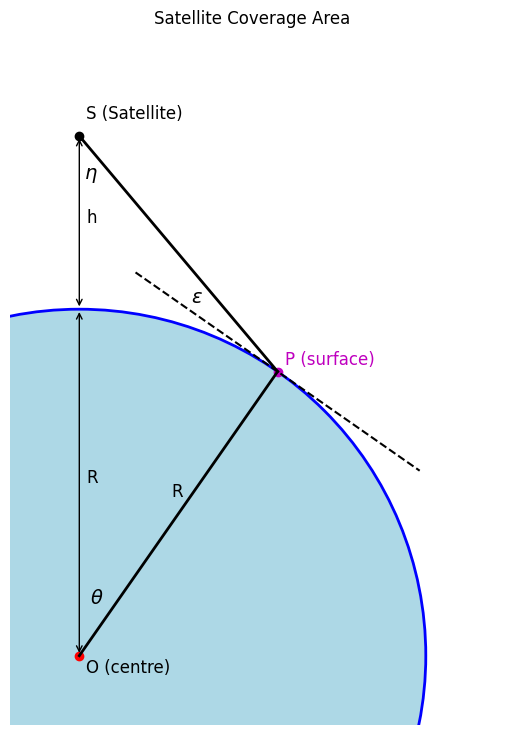

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import root_scalar

# Normalized units
R = 1.0        # Earth radius
h = 0.5        # Altitude = R/2
eps = np.deg2rad(15)  # Elevation angle (unused here but consistent)
angle_target = np.deg2rad(90 + 15)  # 105° interior angle

# Key points
O = np.array([0.0, 0.0])
S = np.array([0.0, R + h])

# Find surface point P such that ∠OPS = 105°
def angle_diff(alpha):
    P = np.array([R * np.cos(alpha), R * np.sin(alpha)])
    v1 = O - P
    v2 = S - P
    cosang = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    return np.arccos(cosang) - angle_target

res = root_scalar(angle_diff, bracket=[0, np.pi/2], method='bisect')
alpha = res.root
P = np.array([R * np.cos(alpha), R * np.sin(alpha)])

# Compute tangent direction at P (perpendicular to OP)
OP = P - O
tangent = np.array([-OP[1], OP[0]])
tangent /= np.linalg.norm(tangent)

# Plot
fig, ax = plt.subplots(figsize=(10, 9))
ax.set_aspect('equal')

# Earth
earth = plt.Circle((0, 0), R, color='lightblue', ec='blue', lw=2)
ax.add_artist(earth)

# Points
ax.plot(*O, 'ro'); ax.text(0.02, -0.05, 'O (centre)', fontsize=12)
ax.plot(*S, 'ko'); ax.text(0.02, R + h + 0.05, 'S (Satellite)', fontsize=12)
ax.plot(*P, 'mo'); ax.text(P[0]+0.02, P[1]+0.02, 'P (surface)', color='m', fontsize=12)

# Lines: centre->surface and surface->satellite
ax.plot([O[0], P[0]], [O[1], P[1]], 'k-', lw=2)
ax.plot([S[0], P[0]], [S[1], P[1]], 'k-', lw=2)

# Draw longer dashed tangent at P (1/4 radius)
seg = R / 2  # segment length = 0.25*R
t1 = P + tangent * seg
t2 = P - tangent * seg
ax.plot([t1[0], t2[0]], [t1[1], t2[1]], 'k--', lw=1.5)

# Annotate R on OP
mid_OP = (O + P) / 2
ax.text(mid_OP[0] - 0.02, mid_OP[1] + 0.05, 'R', fontsize=12)

# Annotate angles:
# θ at O between OS and OP
ax.text(0.03, 0.15, r'$\theta$', fontsize=14)

# η at S between SO and SP
# Compute midpoint of angle at S: move from S towards midpoint of O and P
mid_SP = (O + P) / 2
label_S = S + 0.15 * (mid_SP - S)
ax.text(label_S[0] - 0.03, label_S[1] + 0.04, r'$\eta$', fontsize=14)
ax.text(P[0] - 0.25, P[1] + 0.2, r'$\epsilon$', fontsize=14)

# Annotate R and h arrows
ax.annotate('', xy=(0, R), xytext=(0, 0), arrowprops=dict(arrowstyle='<->'))
ax.text(0.02, R/2, 'R', fontsize=12)
ax.annotate('', xy=(0, R), xytext=(0, R + h), arrowprops=dict(arrowstyle='<->'))
ax.text(0.02, R + h/2, 'h', fontsize=12)

# Formatting
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, R + h + 0.3)
ax.axis('off')
plt.title('Satellite Coverage Area')
plt.show()
